# **Multi-layer Perceptron**


In [ ]:
%%time
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns

# Load tips dataset
tips = sns.load_dataset('tips')

# Preprocessing
# Converting categorical variables to dummy variables
tips = pd.get_dummies(tips, drop_first=True)

# Selecting features and target (predicting 'tip' based on other features)
X = tips.drop('tip', axis=1)
y = tips['tip']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

# Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Building the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', 
                          input_shape=(X_train.shape[1],)), # Input layer
    
    tf.keras.layers.Dense(32, activation='relu'), # Hidden layer
    
    tf.keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Training the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Evaluating the model (using Mean Squared Error)
loss = model.evaluate(X_test, y_test, verbose=0)
# print the MSE of X_test
print('Mean Squared Error: ', loss[0])

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 13.6650 - mae: 3.4095
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 9.7374 - mae: 2.8440
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 7.8982 - mae: 2.4881
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 6.2536 - mae: 2.0843
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 4.0607 - mae: 1.5868
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 3.9821 - mae: 1.4668
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2.7401 - mae: 1.1742
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2.2692 - mae: 1.1055
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 1.6762 - mae: 1.0123
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 1.5219 - mae: 0.9756
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1.3320 - mae: 0.9118
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.3442 - mae: 0.8967
Epoch 13/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/st

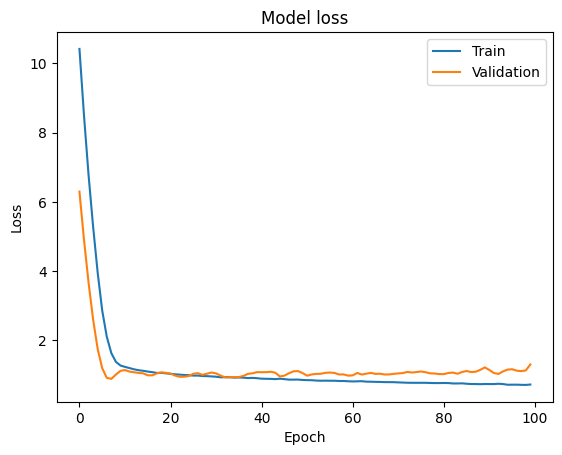

In [ ]:
%%time
# Building the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)), # Input layer
    tf.keras.layers.Dense(32, activation='relu'), # Hidden layer
    tf.keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# train the model and plot the training and testing loss and accuracy at each epoc
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0, validation_data=(X_test, y_test))

# Evaluating the model (using Mean Squared Error)
loss = model.evaluate(X_test, y_test, verbose=0)
loss

# Plotting the training and testing loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# **Assignment:** what is a Validation Set? or validation loss?

### **AS of Validation set:**
#### A portion of your data that's used to evaluate how well a model generalizes to unseen data during training
### **AS of Validation Loss:** 
#### A measure of how well the model performs on the validation set, calculated after each epoch or at specific intervals during training. 

---

# Early Stopping of Epochs

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - loss: 9.5136 - val_loss: 5.2020
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 7.2868 - val_loss: 3.6573
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 5.4795 - val_loss: 2.5113
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 4.1718 - val_loss: 1.7276
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 3.0674 - val_loss: 1.3315
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 2.2970 - val_loss: 1.2571
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 1.4872 - val_loss: 1.3756
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 1.4804 - val_loss: 1.5496
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 1.4126 - val_loss: 1.4680
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 1.3730 - val_loss: 1.2937
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 1.1502 - val_loss: 1.1868
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.9917 - val_lo

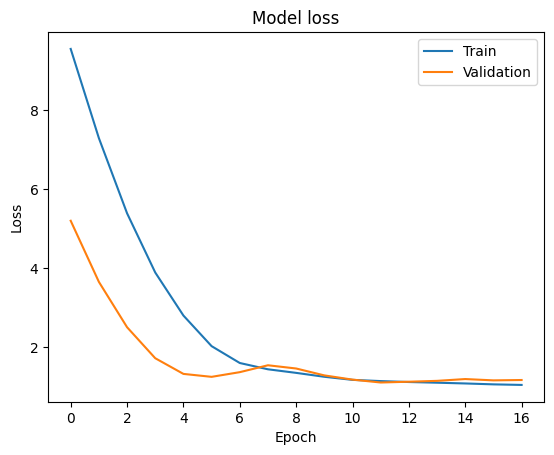

CPU times: total: 3.89 s
Wall time: 10.9 s


In [5]:
%%time
from tensorflow.keras.callbacks import EarlyStopping

# Building the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)), # Input layer
    tf.keras.layers.Dense(32, activation='relu'), # Hidden layer
    tf.keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Define the callback function
early_stopping = EarlyStopping(patience=5)

# Train the model with the callback function
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping])

# Evaluating the model (using Mean Squared Error)
loss = model.evaluate(X_test, y_test, verbose=0)
loss

# Plotting the training and testing loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

-----------------